In [49]:
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea.analysis_tools import PackedSelection
import hist
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import uproot 
#plt.style.use(hep.style.CMS)

In [50]:
redirector = {"hdfs":"/hdfs",
              "global":"root://cms-xrd-global.cern.ch//",
              "infn":"root://xrootd-cms.infn.it//",
              "fermilab":"root://cmsxrootd.fnal.gov//",
             }
file = "/store/mc/RunIIAutumn18NanoAODv7/MonoHTobb_ZpBaryonic_TuneCP2_13TeV_madgraph-pythia8/NANOAODSIM/Nano02Apr2020_rp_102X_upgrade2018_realistic_v21-v1/10000/0EE0D641-EDAE-D547-ABAD-56D54B768C5B.root"
filename= redirector["hdfs"] + file

In [51]:
events = NanoEventsFactory.from_root(
    filename,
    schemaclass = NanoAODSchema.v7,
    metadata = {"Dataset":"HiggsTobbbarZprimeBaryonic","isMC":True},
    #entry_stop=10e5 ,
).events()
print("Number of events loaded : ", len(events))

Number of events loaded :  180000


In [52]:
selection = PackedSelection()
selection.add("pt25", ak.all(events.Jet.pt > 25, axis=1))
cuts = selection.all("pt25")
good_events = events[cuts]

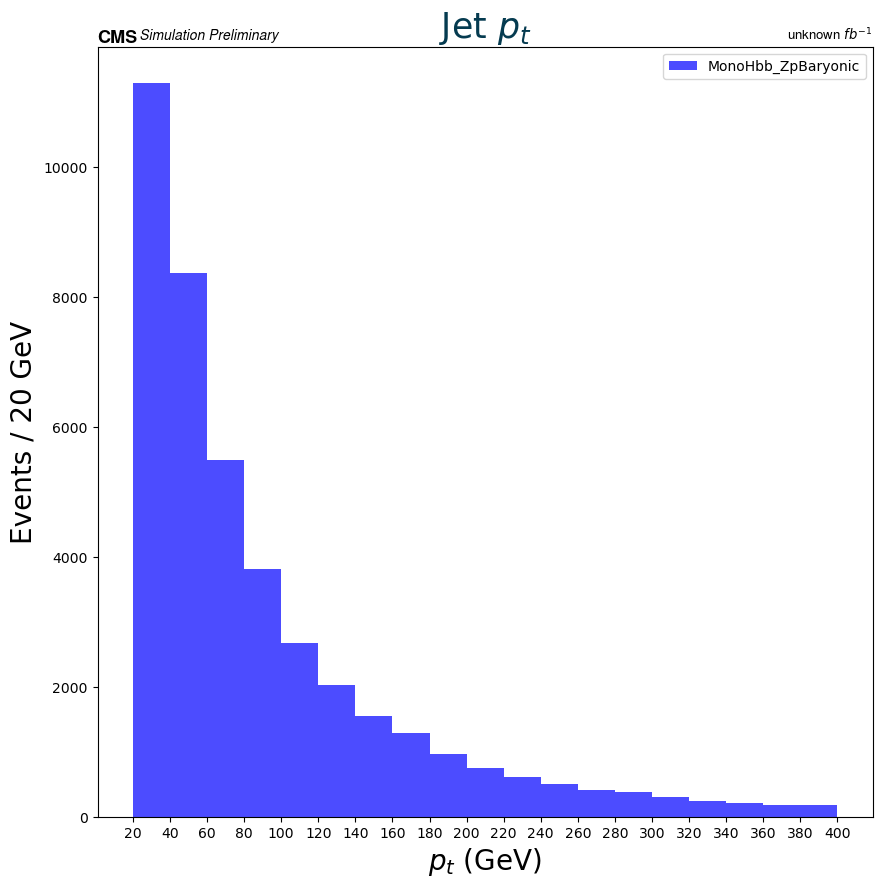

In [53]:
x_min = 20
x_max = 400
bin_size = 20
n_bins=int((x_max - x_min)/bin_size)
h = hist.Hist.new.Reg(n_bins,x_min,x_max).Double().fill(ak.flatten(good_events.Jet.pt))
fig , ax= plt.subplots(figsize=(10,10))
hep.histplot(h, 
             #bins=bins ,
             histtype="fill",
             color="b",
             alpha=0.7,
             edgecolor="black",
             label=r"MonoHbb_ZpBaryonic",
             ax=ax
            )
ax.set_title("Jet $p_t$", fontsize=25, color="#053B50")
ax.set_xlabel("$p_t$ (GeV)", fontsize=20)
ax.set_ylabel(f"Events / {bin_size} GeV", fontsize=20)
ax.set_xticks(np.arange(x_min,x_max+bin_size,bin_size))
hep.cms.label("Preliminary",data=False, rlabel="unknown $fb^{-1}$")
ax.legend()
fig.savefig("Result.jpg",dpi=300)
fig.show()